In [49]:
import numpy as np
import matplotlib.pyplot as plt

###### Um fazendeiro, verificando a necessidade de construir um novo estábulo, escolheu um local próximo 
###### a uma nascente, de forma que, perto do estábulo, pudesse ter também um reservatório de água. 
###### Junto à nascente ele construiu uma barragem e instalou uma bomba, para que a água pudesse 
###### chegar ao reservatório. Verificou-se que:
###### i) A vazão da fonte de alimentação, Q, era aproximadamente de 30 litros por minuto (quantidade de água que aflui à bomba).
###### ii) A altura da queda, h, era de 6 metros (altura entre a bomba e o nível da água da fonte de alimentação).
###### iii) O reservatório encontrava-se a uma altura de recalque, H, de 46 metros (altura entre a bomba e o nível da água no reservatório).
###### Munido destes dados, o fazendeiro gostaria de saber quantas vacas leiteiras poderiam ocupar o 
###### estábulo, sabendo que o consumo diário de cada uma, incluindo o asseio do estábulo, é de 120 litros.
###### Observe que, para resolver o problema, deve-se calcular a vazão de recalque, q, que é a quantidade 
###### de litros por minuto que entram no reservatório.
###### onde R é o rendimento da bomba.
###### Conclui-se, portanto, que para determinar a vazão de recalque é necessário conhecer o rendimento 
###### da bomba. A tabela a seguir relaciona a razão entre as alturas h/H  e o rendimento da bomba instalada.
###### Consultando a tabela, verificou-se que para calcular o R associado a um valor de h/H  deveria ser feita 
###### uma regressão linear. Usando o método dos mínimos quadrados, ajude o fazendeiro a fazer o cálculo.

In [2]:
def pv(u, v):
    pv = u*v
    pv = np.cumsum(pv)
    pv = pv[len(pv)-1]
    return pv

In [18]:
u0 = np.array([1,1,1,1,1,1,1])
u1 = np.array([6, 6.5, 7, 7.5, 8, 8.5, 9])

In [20]:
y = np.array([0.6728, 0.6476, 0.6214, 0.5940, 0.5653, 0.5350, 0.5020])

In [22]:
a = np.array([[pv(u0, u0), pv(u1, u0)],
             [pv(u0, u1), pv(u1, u1)]])

In [23]:
b = np.array([[pv(y, u0)],
             [pv(y, u1)]])

In [24]:
n = np.linalg.inv(a)
p = np.dot(n, b)

In [25]:
p

array([[ 1.01635357],
       [-0.05669286]])

In [26]:
p[1,0]

-0.0566928571428571

In [27]:
print(f'O polinômio interpolador é: {p[1,0]}x + {p[0,0]}')

O polinômio interpolador é: -0.0566928571428571x + 1.0163535714285743


In [28]:
def f(x, a, b):
    return (a*x) + b

In [45]:
val = np.linspace(6,9,50)

Text(0,0.5,'h/H')

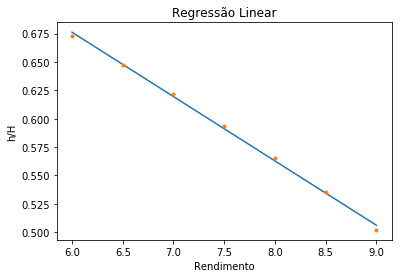

In [48]:
plt.plot(val, f(val, p[1,0], p[0,0]))
plt.plot(u1, y, '.')
plt.title('Regressão Linear')
plt.xlabel('Rendimento')
plt.ylabel('h/H')

In [43]:
rendimento = f(6/46, p[1,0], p[0,0])
vazao = 30*(6/46)*rendimento
print(f'O rendimento é de {rendimento}')
print(f'A vazão é de {vazao} l/min')
h_dias = 24*60
agua = vazao * h_dias
vacas = agua/120
print(f'O fazendeiro poderá ter {int(vacas//1)} vacas')

O rendimento é de 1.0089588509316798
A vazão é de 3.9480998514717904 l/min
O fazendeiro poderá ter 47 vacas
